In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import deepgraph as dg
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [ ]:
# pip install --upgrade nbformat

In [2]:
import plotly.graph_objects as go

labels = ["CTX", "FSN", "MSN D1", "MSN D2", "GPe", "STN", "SNr"]

source = [0, 1, 1, 2, 2, 3, 4, 5] 
target = [1, 2, 3, 3, 4, 5, 5, 6] 
value =  [8, 10, 6, 4, 7, 5, 3, 6]  

# Sankey Diagram 
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,  
        color="blue"   
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(31, 119, 180, 0.5)" 
    )
))

fig.update_layout(title_text="Neural Network Connectivity", font_size=12)
fig.show()


In [2]:
labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

source = [
    0, 0, 0,  
    1, 1, 1, 
    2, 2, 2   
]

target = [
    3, 4, 5,  
    4, 3, 5,  
    5, 3, 4   
]

value = [
    8, 5, 3,   
    8, 5, 3,  
    8, 5, 3  
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "blue", "blue", "red", "red", "red"], 
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9], 
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9], 
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
               "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"]
    )
))

fig.show()

In [24]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "Striatum1", "Striatum2", "Striatum3"]

source = [
    0, 0, 0,
    1, 1, 1,
    2, 2, 2
]

target = [
    3, 4, 5,
    4, 3, 5,
    5, 3, 4
]

value = [
    8, 5, 3,
    8, 4, 4,
    8, 3, 5
]

node_colors = ["blue", "red", "green", '#3370d6', '#ff75db', '#59ba9c']  

max_value_to_color = {
    8: "rgba(31, 119, 180, 0.8)",  # 파랑
    5: "rgba(255, 0, 0, 0.8)",  # 빨강
    3: "rgba(50, 205, 50, 0.8)"  # 초록
}

for i in range(3, 6):
    incoming_values = [value[idx] for idx, tgt in enumerate(target) if tgt == i]
    max_value = max(incoming_values)
    node_colors.append(max_value_to_color[max_value])

fig = go.Figure(go.Sankey(
    node=dict(
        pad=1,
        thickness=7,
        line=dict(color="white", width=0.05),
        label=labels,
        color=node_colors,
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9],
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9],
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[
            "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
            "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.3)", "rgba(255, 0, 0, 0.3)",
            "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.3)", "rgba(50, 205, 50, 0.5)"
        ]
    )
))

fig.show()


In [33]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "Striatum1", "Striatum2", "Striatum3"]
labels.extend(["SNr"])
source = [
    0, 0, 0,
    1, 1, 1,
    2, 2, 2
]

target = [
    3, 4, 5,
    4, 3, 5,
    5, 3, 4
]

value = [
    8, 5, 3,
    8, 4, 4,
    8, 3, 5
]
source.extend([3, 4, 5])
target.extend([6, 6, 6])
value.extend([8, 7, 6])  # 예시 값

node_colors = ["blue", "red", "green", '#3370d6', '#ff75db', '#59ba9c']  
node_colors.append('#808080') 

max_value_to_color = {
    8: "rgba(31, 119, 180, 0.8)",  # 파랑
    5: "rgba(255, 0, 0, 0.8)",  # 빨강
    3: "rgba(50, 205, 50, 0.8)"  # 초록
}

for i in range(3, 6):
    incoming_values = [value[idx] for idx, tgt in enumerate(target) if tgt == i]
    max_value = max(incoming_values)
    node_colors.append(max_value_to_color[max_value])

fig = go.Figure(go.Sankey(
    node=dict(
        pad=1,
        thickness=7,
        line=dict(color="white", width=0.05),
        label=labels,
        color=node_colors,
        x=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.9],
        y=[0.1, 0.5, 0.9, 0.3, 0.7, 0.5, 0.5],
    ),

    link=dict(
        source=source,
        target=target,
        value=value,
        color=[
            "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
            "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.3)", "rgba(255, 0, 0, 0.3)",
            "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.3)", "rgba(50, 205, 50, 0.5)"
        ]
    )
    
))

fig.show()

In [34]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "Striatum1", "Striatum2", "Striatum3"]
labels.extend(["SNr"])

source = [
    0, 0, 0,
    1, 1, 1,
    2, 2, 2
]

target = [
    3, 4, 5,
    4, 3, 5,
    5, 3, 4,
    6, 6, 6
]

value = [
    8, 5, 3,
    8, 4, 4,
    8, 3, 5,
    8, 7, 6
]

node_colors = [
    "blue", "red", "green", '#3370d6', '#ff75db', '#59ba9c', '#808080'
]

max_value_to_color = {
    8: "rgba(31, 119, 180, 0.8)",
    5: "rgba(255, 0, 0, 0.8)",
    3: "rgba(50, 205, 50, 0.8)"
}

for i in range(3, 6):
    incoming_values = [value[idx] for idx, tgt in enumerate(target) if tgt == i]
    max_value = max(incoming_values)
    node_colors.append(max_value_to_color[max_value])

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=1,
        thickness=7,
        line=dict(color="white", width=0.05),
        label=labels,
        color=node_colors,
        x=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.9],
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9, 0.5],
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[
            "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
            "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
            "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"
        ]
    )
))

fig.show()

In [40]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "Striatum1", "Striatum2", "Striatum3", "SNr"]

source = [
    0, 0, 0,
    1, 1, 1,
    2, 2, 2,
    3, 4, 5,
]

target = [
    3, 4, 5,
    4, 3, 5,
    5, 3, 4,
    6, 6, 6,
]

value = [
    8, 5, 3,
    8, 4, 4,
    8, 3, 5,
    12, 18, 12
]

node_colors = [
    "blue", "red", "green", '#3370d6', '#ff75db', '#59ba9c', '#D975E8'
]

max_value_to_color = {
    8: "rgba(31, 119, 180, 0.8)",
    5: "rgba(255, 0, 0, 0.8)",
    3: "rgba(50, 205, 50, 0.8)"
}

for i in range(3, 6):
    incoming_values = [value[idx] for idx, tgt in enumerate(target) if tgt == i]
    max_value = max(incoming_values)
    node_colors.append(max_value_to_color[max_value])

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",
    '#3370d6', '#ff75db', '#59ba9c'
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=1,
        thickness=7,
        line=dict(color="white", width=0.05),
        label=labels,
        color=node_colors,
        x=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.9],
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9, 0.5],
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()


In [9]:
### CTX - Striatum - GPe - STN - SNr

labels = [
    "CTX1", "CTX2", "CTX3",  
    "FSN (CTX1)", "MSN D1 (CTX1)", "MSN D2 (CTX1)",  
    "FSN (CTX2)", "MSN D1 (CTX2)", "MSN D2 (CTX2)",  
    "FSN (CTX3)", "MSN D1 (CTX3)", "MSN D2 (CTX3)",  
    "STN1", "STN2", "STN3",  
    "SNr1", "SNr2", "SNr3"  
]

source = [
    0, 0, 0,  
    1, 1, 1,  
    2, 2, 2,  
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11,  
    12, 13, 14,  
    12, 13, 14,  
    12, 13, 14   
]

target = [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11,  
    12, 12, 12,  
    13, 13, 13,  
    14, 14, 14,  
    15, 15, 15,  
    16, 16, 16,  
    17, 17, 17   
]

value = [
    8, 5, 3,  
    8, 5, 3,  
    8, 5, 3,  
    4, 2, 1,  
    4, 2, 1,  
    4, 2, 1,  
    3, 3, 3,  
    2, 2, 2,  
    1, 1, 1   
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.6)", "rgba(50, 205, 50, 0.4)", "rgba(50, 205, 50, 0.2)",    
    "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)", "rgba(50, 205, 50, 0.2)"     
]

node_colors = [
    "blue", "blue", "blue",  
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)",     
    "rgba(31, 119, 180, 0.5)", "rgba(255, 0, 0, 0.5)", "rgba(50, 205, 50, 0.5)"      
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()


In [5]:
### CTX - Striatum - SNr
import plotly.graph_objects as go

labels = [
    "CTX1", "CTX2", "CTX3",  
    "FSN (CTX1)", "MSN D1 (CTX1)", "MSN D2 (CTX1)",  
    "FSN (CTX2)", "MSN D1 (CTX2)", "MSN D2 (CTX2)",  
    "FSN (CTX3)", "MSN D1 (CTX3)", "MSN D2 (CTX3)",  
    "SNr1", "SNr2", "SNr3"
]

source = [
    0, 0, 0,  
    1, 1, 1,  
    2, 2, 2,  
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11
]

source += [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11 
]

target = [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11,  
    12, 12, 12,  
    13, 13, 13,  
    14, 14, 14
]

value = [
    8, 5, 3,  
    8, 5, 3,  
    8, 5, 3,  
    4, 2, 1,  
    4, 2, 1,  
    4, 2, 1
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.6)", "rgba(50, 205, 50, 0.4)", "rgba(50, 205, 50, 0.2)",    
    "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)", "rgba(50, 205, 50, 0.2)"     
]

node_colors = [
    "blue", "blue", "blue",  
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)",     
    "rgba(31, 119, 180, 0.5)", "rgba(255, 0, 0, 0.5)", "rgba(50, 205, 50, 0.5)",      
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=0.1,
        thickness=30,
        line=dict(color="white", width=0.05),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()

In [20]:
### CTX - STN - SNr

import plotly.graph_objects as go

labels = [
    "CTX1", "CTX2", "CTX3",
    "Striatum (CTX1-1)", "Striatum (CTX1-2)", "Striatum (CTX1-3)",
    "Striatum (CTX2-1)", "Striatum (CTX2-2)", "Striatum (CTX2-3)",
    "Striatum (CTX3-1)", "Striatum (CTX3-2)", "Striatum (CTX3-3)",
    "SNr1", "SNr2", "SNr3"
]

source = [
    0, 0, 0,
    1, 1, 1,
    2, 2, 2,
    3, 4, 5,
    6, 7, 8,
    9, 10, 11
]

source += [
    3, 4, 5,
    6, 7, 8,
    9, 10, 11
]

target = [
    3, 4, 5,
    6, 7, 8,
    9, 10, 11,
    12, 12, 12,
    13, 13, 13,
    14, 14, 14
]

value = [
    8, 5, 3,
    8, 5, 3,
    8, 5, 3,
    4, 2, 1,
    4, 2, 1,
    4, 2, 1
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",
    "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)", "rgba(31, 119, 180, 0.2)",
    "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)", "rgba(255, 0, 0, 0.2)",
    "rgba(50, 205, 50, 0.6)", "rgba(50, 205, 50, 0.4)", "rgba(50, 205, 50, 0.2)"
]

node_colors = [
    "blue", "blue", "blue",
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)"
]

max_value_to_color = {
    8: "rgba(31, 119, 180, 0.8)",
    5: "rgba(255, 0, 0, 0.8)",
    3: "rgba(50, 205, 50, 0.8)"
}

for i in range(0, 9, 3):
    start_index = i
    end_index = i + 3
    max_value = max(value[start_index:end_index])
    color = max_value_to_color.get(max_value, "gray")
    node_colors[start_index:end_index] = [color] * 3

fig = go.Figure(go.Sankey(
    node=dict(
        pad=0.1,
        thickness=30,
        line=dict(color="white", width=0.05),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()

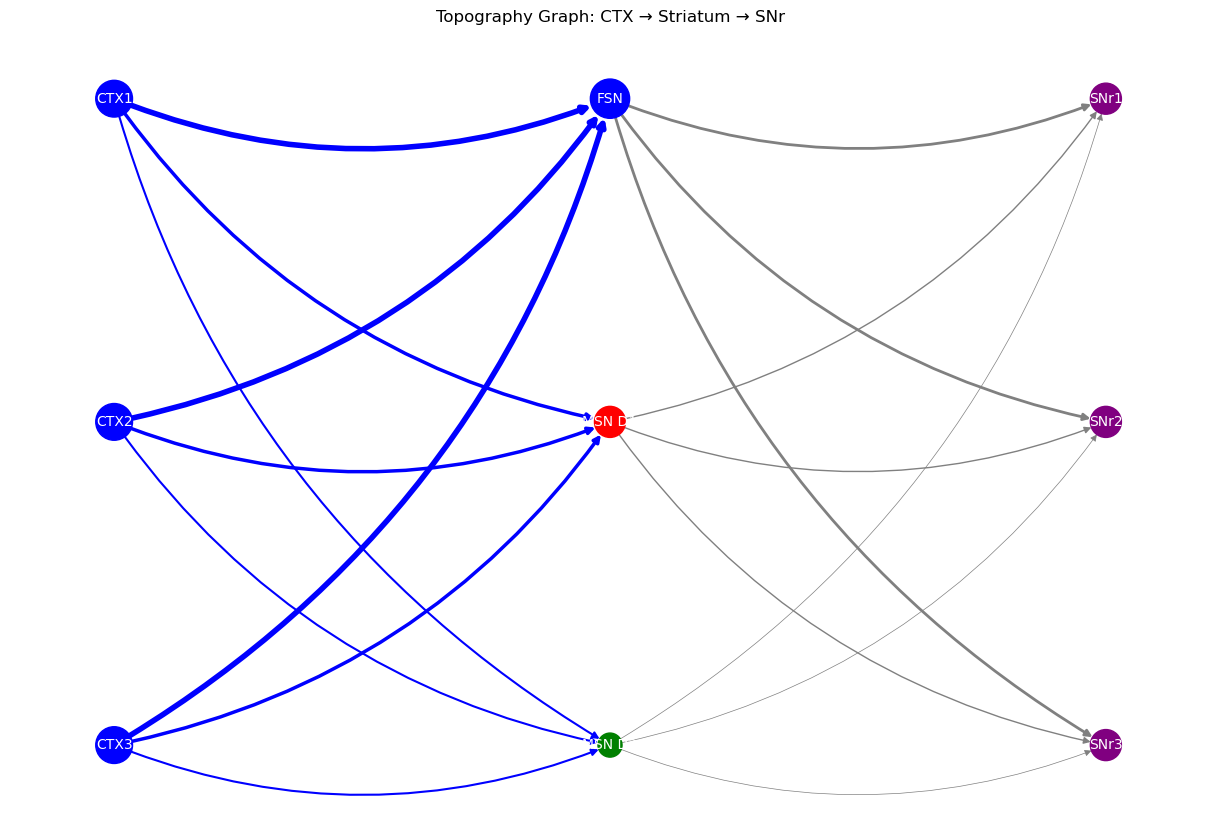

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

ctx_nodes = ["CTX1", "CTX2", "CTX3"]
striatum_nodes = ["FSN", "MSN D1", "MSN D2"]
snr_nodes = ["SNr1", "SNr2", "SNr3"]

for node in ctx_nodes:
    G.add_node(node, layer=0)

for node in striatum_nodes:
    G.add_node(node, layer=1)

for node in snr_nodes:
    G.add_node(node, layer=2)

# CTX - Striatum - SNr 
edges = [
    ("CTX1", "FSN", 8), ("CTX1", "MSN D1", 5), ("CTX1", "MSN D2", 3),
    ("CTX2", "FSN", 8), ("CTX2", "MSN D1", 5), ("CTX2", "MSN D2", 3),
    ("CTX3", "FSN", 8), ("CTX3", "MSN D1", 5), ("CTX3", "MSN D2", 3),
    ("FSN", "SNr1", 4), ("MSN D1", "SNr1", 2), ("MSN D2", "SNr1", 1),
    ("FSN", "SNr2", 4), ("MSN D1", "SNr2", 2), ("MSN D2", "SNr2", 1),
    ("FSN", "SNr3", 4), ("MSN D1", "SNr3", 2), ("MSN D2", "SNr3", 1)
]

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos = {
    "CTX1": (-1, 2),
    "CTX2": (-1, 1),
    "CTX3": (-1, 0),
    "FSN": (0, 2),
    "MSN D1": (0, 1),
    "MSN D2": (0, 0),
    "SNr1": (1, 2),
    "SNr2": (1, 1),
    "SNr3": (1, 0)
}

# CTX
ctx_edge_colors = {}
for node in ctx_nodes:
    outgoing_edges = [(u, v) for u, v in G.out_edges(node)]
    max_value = max([G[u][v]["weight"] for u, v in outgoing_edges])
    if max_value == 8:
        ctx_edge_colors[node] = "blue"
    elif max_value == 5:
        ctx_edge_colors[node] = "red"
    else:
        ctx_edge_colors[node] = "green"

striatum_colors = {}
striatum_sizes = {}
for node in striatum_nodes:
    incoming_edges = [(u, v) for u, v in G.in_edges(node)]
    max_value = max([G[u][v]["weight"] for u, v in incoming_edges])
    striatum_sizes[node] = max_value * 100
    if max_value == 8:
        striatum_colors[node] = "blue"
    elif max_value == 5:
        striatum_colors[node] = "red"
    else:
        striatum_colors[node] = "green"

node_colors = [ctx_edge_colors[node] if node in ctx_nodes else striatum_colors.get(node, "purple") for node in G.nodes]
node_sizes = [700 if node in ctx_nodes else striatum_sizes.get(node, 500) for node in G.nodes]

edge_colors = []
edge_widths = []
for u, v, data in G.edges(data=True):
    if u in ctx_nodes:
        edge_colors.append(ctx_edge_colors[u])  
    elif data["weight"] == 8:
        edge_colors.append("blue")
    elif data["weight"] == 5:
        edge_colors.append("red")
    elif data["weight"] == 3:
        edge_colors.append("green")
    else:
        edge_colors.append("gray")
    edge_widths.append(data["weight"] * 0.5)

plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    edge_color=edge_colors,
    width=edge_widths,
    font_size=10,
    font_color="white",
    connectionstyle="arc3,rad=0.2"
)

plt.title("Topography Graph: CTX → Striatum → SNr")
plt.show()